<a href="https://colab.research.google.com/github/filipecareli/Bootcamp-Alura-Data-Science/blob/main/Filipe_Careli.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Resumo:

Vemos constantemente nos noticiários a informação de que o percentual de vacinados por ano tem diminuído no Brasil. Esse dado é verdadeiro? Quais as possíveis consequências disso?

Vamos analisar os dados sobre a vacinação contra sarampo no Brasil ao longo dos anos e por região para verificar o que está acontecendo.


## Análise dos dados:

O dado principal que será utilizado é o percentual da meta cumprida para cada vacina ao longo dos anos. Vem comigo?
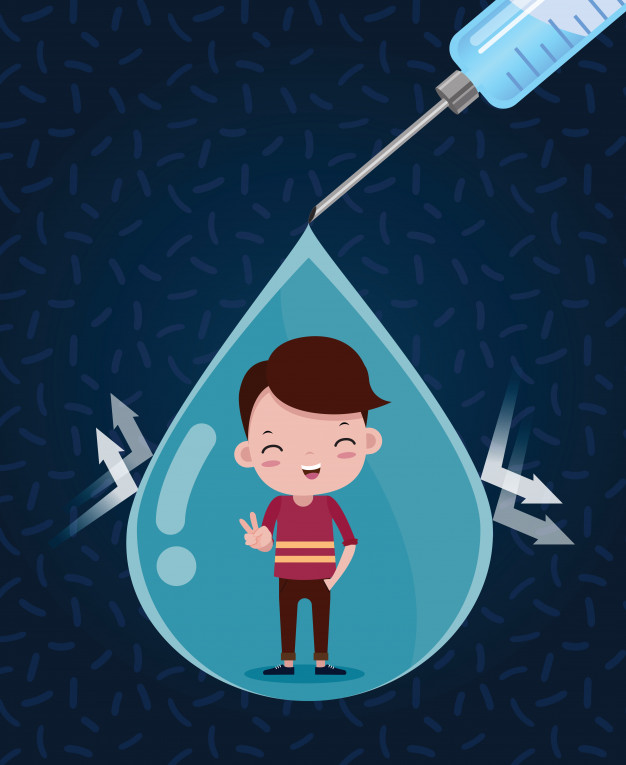

###Análise Exploratória

####Importando Bibliotecas

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

####Importando Dados

Os dados utilizados serão as Coberturas Vacinais por tempo, Unidade da Federação e por Região.
Período para unidades da federação e região: 2015-2019
Período por tempo: 2005-2019

Fonte: Programa Nacional de Imunizações (http://tabnet.datasus.gov.br/)

Notas:

Data de atualização dos dados: 04/09/2019

In [ ]:
##### Carregar dados de cobertura vacinal por região
link_cv_regional = 'https://raw.githubusercontent.com/filipecareli/Bootcamp-Alura-Data-Science/main/A160954189_28_143_208.csv'
cv_regional = pd.read_csv(link_cv_regional, sep=';', encoding='ISO-8859-1',
                                skiprows=3, skipfooter=19, decimal=',',na_values='...')
cv_regional.tail(2)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  after removing the cwd from sys.path.


,Região,072 BCG,099 Hepatite B em crianças até 30 dias,061 Rotavírus Humano,053 Meningococo C,073 Hepatite B,080 Penta,012 Pneumocócica,074 Poliomielite,100 Poliomielite 4 anos,006 Febre Amarela,096 Hepatite A,091 Pneumocócica(1º ref),092 Meningococo C (1º ref),093 Poliomielite(1º ref),021 Tríplice Viral D1,098 Tríplice Viral D2,097 Tetra Viral(SRC+VZ),075 DTP,102 DTP REF (4 e 6 anos),095 Tríplice Bacteriana(DTP)(1º ref),094 Dupla adulto e tríplice acelular gestante,003 dTpa gestante,Total
4,5 Região Centro-Oeste,92.36,84.23,85.28,86.88,88.92,83.81,88.21,84.21,0.28,79.32,80.13,78.67,83.94,74.37,86.42,76.31,69.65,84.12,3.56,69.11,41.33,48.78,77.90
5,Total,89.67,78.57,82.22,83.62,87.63,81.22,85.74,81.31,0.43,47.09,77.14,76.53,79.79,70.96,86.29,71.59,49.74,81.51,2.77,66.09,37.83,45.11,72.45


In [ ]:
##### Carregar dados de cobertura vacinal por região

link_cv_estado = 'https://raw.githubusercontent.com/filipecareli/Bootcamp-Alura-Data-Science/main/A161134189_28_143_208.csv'
cv_estado = pd.read_csv(link_cv_estado, sep=';', encoding='ISO-8859-1',
                                skiprows=3, skipfooter=19, decimal=',',na_values='...')
cv_estado.tail(3)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  """


,Unidade da Federação,072 BCG,099 Hepatite B em crianças até 30 dias,061 Rotavírus Humano,053 Meningococo C,073 Hepatite B,080 Penta,012 Pneumocócica,074 Poliomielite,100 Poliomielite 4 anos,006 Febre Amarela,096 Hepatite A,091 Pneumocócica(1º ref),092 Meningococo C (1º ref),093 Poliomielite(1º ref),021 Tríplice Viral D1,098 Tríplice Viral D2,097 Tetra Viral(SRC+VZ),075 DTP,102 DTP REF (4 e 6 anos),095 Tríplice Bacteriana(DTP)(1º ref),094 Dupla adulto e tríplice acelular gestante,003 dTpa gestante,Total
25,52 Goiás,87.98,70.68,83.06,82.91,85.83,78.64,83.94,79.85,0.21,73.90,76.57,75.54,80.25,70.26,82.78,71.63,63.89,78.88,4.11,60.84,30.35,47.17,73.02
26,53 Distrito Federal,93.78,104.62,85.82,90.72,91.74,86.63,90.46,87.61,0.12,83.42,83.35,80.98,87.75,75.77,86.88,85.61,82.12,87.32,3.49,74.09,53.51,53.05,83.16
27,Total,89.67,78.57,82.22,83.62,87.63,81.22,85.74,81.31,0.43,47.09,77.14,76.53,79.79,70.96,86.29,71.59,49.74,81.51,2.77,66.09,37.83,45.11,72.45


In [ ]:
##### Carregar dados por ano

link_cv_ano = 'https://raw.githubusercontent.com/filipecareli/Bootcamp-Alura-Data-Science/main/A164732189_28_143_208.csv'
cv_ano = pd.read_csv(link_cv_ano, sep=';', encoding='ISO-8859-1',
                                skiprows=3, skipfooter=19,decimal=',',na_values='...')
cv_ano.head(3)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  """


,Imuno,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,Total
0,072 BCG,114.48,113.06,111.08,108.91,108.71,106.71,107.94,105.69,107.42,107.28,105.08,95.55,97.12,97.72,52.95,102.65
1,099 Hepatite B em crianças até 30 dias,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-,88.54,90.93,81.75,85.20,86.73,48.33,68.79
2,061 Rotavírus Humano,NaN,46.52,79.79,81.18,85.99,83.04,87.06,86.37,93.52,93.44,95.35,88.98,84.65,89.76,52.47,81.96


####Verificando Dados Faltantes

In [ ]:
#####Qual o tipo de dados por região?

cv_regional.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 24 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Região                                         6 non-null      object 
 1   072 BCG                                        6 non-null      float64
 2   099 Hepatite B  em crianças até 30 dias        6 non-null      float64
 3   061 Rotavírus Humano                           6 non-null      float64
 4   053 Meningococo C                              6 non-null      float64
 5   073 Hepatite B                                 6 non-null      float64
 6   080 Penta                                      6 non-null      float64
 7   012 Pneumocócica                               6 non-null      float64
 8   074 Poliomielite                               6 non-null      float64
 9   100 Poliomielite 4 anos                        6 non-null 

In [ ]:
#####Não há dados faltantes por região

cv_regional.isna().sum()

Região                                           0
072 BCG                                          0
099 Hepatite B  em crianças até 30 dias          0
061 Rotavírus Humano                             0
053 Meningococo C                                0
073 Hepatite B                                   0
080 Penta                                        0
012 Pneumocócica                                 0
074 Poliomielite                                 0
100 Poliomielite 4 anos                          0
006 Febre Amarela                                0
096 Hepatite A                                   0
091 Pneumocócica(1º ref)                         0
092 Meningococo C (1º ref)                       0
093 Poliomielite(1º ref)                         0
021 Tríplice Viral  D1                           0
098 Tríplice Viral  D2                           0
097 Tetra Viral(SRC+VZ)                          0
075 DTP                                          0
102 DTP REF (4 e 6 anos)       

In [ ]:
#####Qual o tipo de dados por estado

cv_estado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 24 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Unidade da Federação                           28 non-null     object 
 1   072 BCG                                        28 non-null     float64
 2   099 Hepatite B  em crianças até 30 dias        28 non-null     float64
 3   061 Rotavírus Humano                           28 non-null     float64
 4   053 Meningococo C                              28 non-null     float64
 5   073 Hepatite B                                 28 non-null     float64
 6   080 Penta                                      28 non-null     float64
 7   012 Pneumocócica                               28 non-null     float64
 8   074 Poliomielite                               28 non-null     float64
 9   100 Poliomielite 4 anos                        28 non-nu

In [ ]:
#####Não há dados faltantes por região

cv_estado.isna().sum()

Unidade da Federação                             0
072 BCG                                          0
099 Hepatite B  em crianças até 30 dias          0
061 Rotavírus Humano                             0
053 Meningococo C                                0
073 Hepatite B                                   0
080 Penta                                        0
012 Pneumocócica                                 0
074 Poliomielite                                 0
100 Poliomielite 4 anos                          0
006 Febre Amarela                                0
096 Hepatite A                                   0
091 Pneumocócica(1º ref)                         0
092 Meningococo C (1º ref)                       0
093 Poliomielite(1º ref)                         0
021 Tríplice Viral  D1                           0
098 Tríplice Viral  D2                           0
097 Tetra Viral(SRC+VZ)                          0
075 DTP                                          0
102 DTP REF (4 e 6 anos)       

In [ ]:
#####Há dados faltantes por ano, são de períodos em que determinadas vacinas ainda não eram aplicadas.

#####Havia dados faltantes representados por "...", que foram considerados nulos no carregamento, porém há dados faltantes representados por "-" também. 
##### ("-" : Dado numérico igual a 0 não resultante de arredondamento.)

#####Porém, para os dados que iremos utilizar, o tratamento dado no carregamento é suficiente.

cv_ano.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Imuno   22 non-null     object 
 1   2005    7 non-null      object 
 2   2006    8 non-null      object 
 3   2007    8 non-null      object 
 4   2008    8 non-null      object 
 5   2009    8 non-null      object 
 6   2010    9 non-null      float64
 7   2011    9 non-null      float64
 8   2012    10 non-null     float64
 9   2013    20 non-null     object 
 10  2014    21 non-null     float64
 11  2015    20 non-null     float64
 12  2016    21 non-null     float64
 13  2017    22 non-null     float64
 14  2018    22 non-null     float64
 15  2019    22 non-null     float64
 16  Total   22 non-null     float64
dtypes: float64(10), object(7)
memory usage: 3.0+ KB


####Escopo da Análise

Segundo reportagem: "Depois de ser eliminado das Américas em 2016 segundo a Organização Mundial da Saúde (OMS), o sarampo voltou a ser uma preocupação brasileira com a ocorrência de dois surtos em 2018 nos estados de Roraima e Amazonas, além de casos confirmados até o momento em São Paulo, Rio Grande do Sul, Rondônia e Rio de Janeiro."

Houve diminuição da taxa de vacinação nesses estado que pudesse levara volta dessa doença?

Fonte: https://portal.fiocruz.br/noticia/sarampo-de-volta-ao-mapa#:~:text=Depois%20de%20ser%20eliminado%20das,Rond%C3%B4nia%20e%20Rio%20de%20Janeiro.

Segundo outra reportagem: "Sarampo, pólio, difteria e rubéola voltam a ameaçar após erradicação no Brasil"
Fonte: https://www.bbc.com/portuguese/brasil-44706026

Vamos analisar, então, os dados de vacinação de Sarampo no Brasil. As vacinas para prevenção dessa doença são: Tríplice Viral e Tetra Viral.

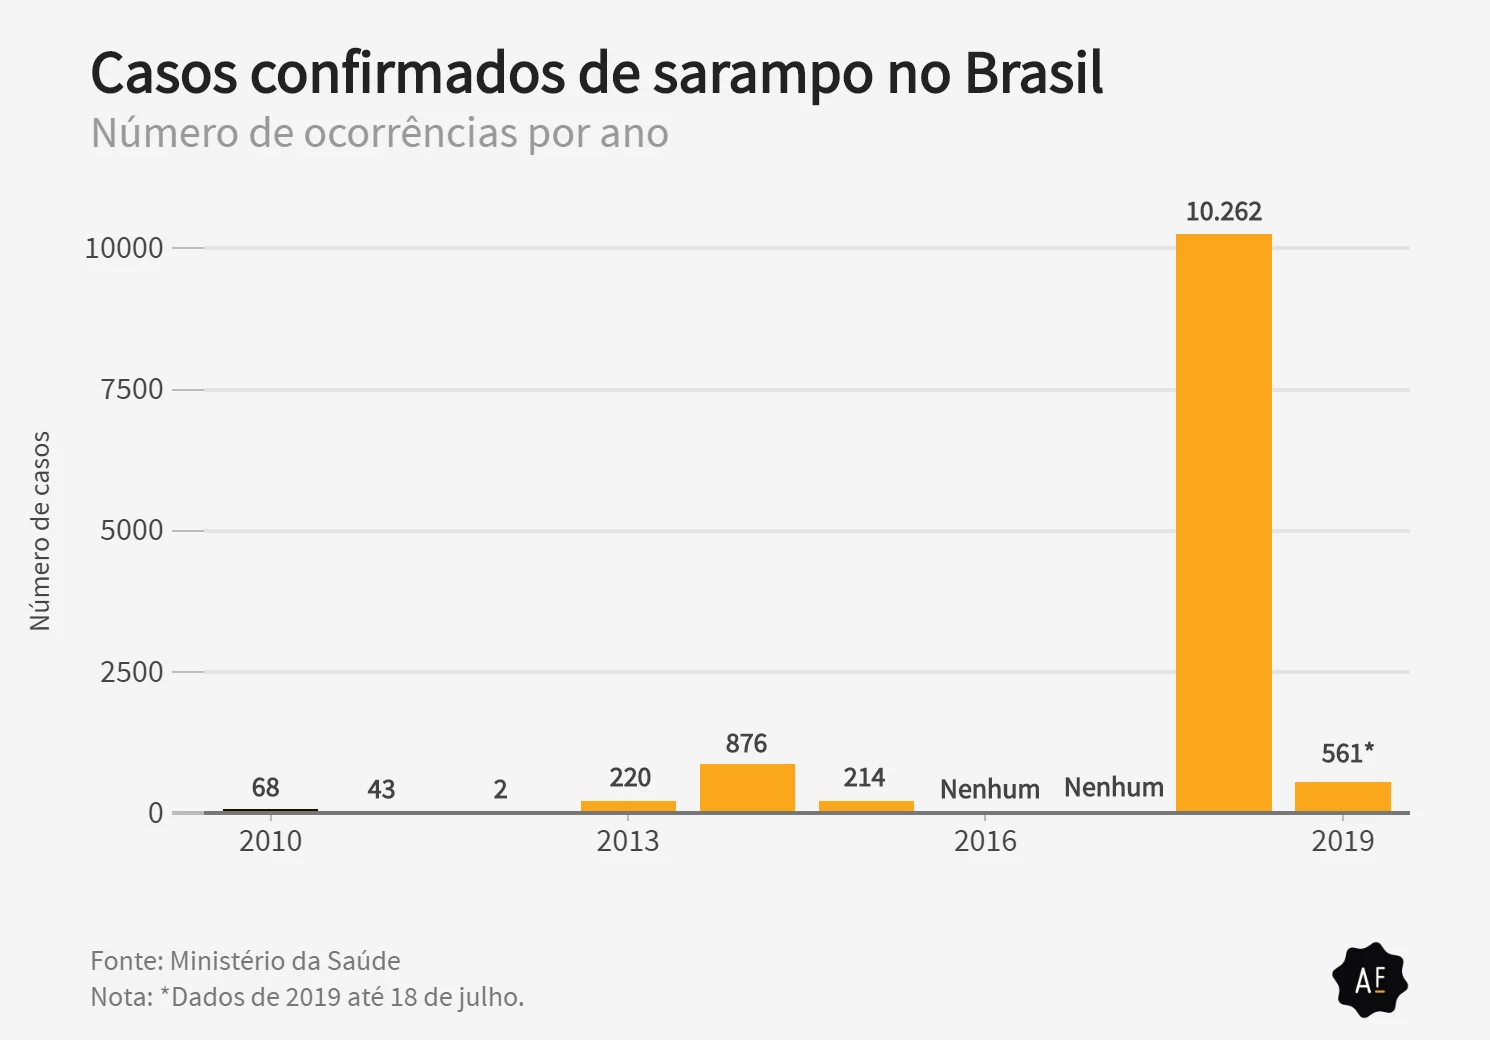

In [ ]:
linhas_usaveis = ['Tríplice Viral D1','Tríplice Viral D2','Tetra Viral']

linhas_usaveis

['Tríplice Viral D1', 'Tríplice Viral D2', 'Tetra Viral']

In [ ]:
#####Invertendo as colunas pelas linhas
cv_ano_t = cv_ano.T

cv_ano_t.head(3)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21
Imuno,072 BCG,099 Hepatite B em crianças até 30 dias,061 Rotavírus Humano,053 Meningococo C,073 Hepatite B,080 Penta,012 Pneumocócica,074 Poliomielite,100 Poliomielite 4 anos,006 Febre Amarela,096 Hepatite A,091 Pneumocócica(1º ref),092 Meningococo C (1º ref),093 Poliomielite(1º ref),021 Tríplice Viral D1,098 Tríplice Viral D2,097 Tetra Viral(SRC+VZ),075 DTP,102 DTP REF (4 e 6 anos),095 Tríplice Bacteriana(DTP)(1º ref),094 Dupla adulto e tríplice acelular gestante,003 dTpa gestante
2005,114.48,NaN,NaN,-,98.46,NaN,NaN,105.12,NaN,42.95,NaN,NaN,NaN,NaN,106.55,NaN,NaN,102.82,NaN,NaN,NaN,NaN
2006,113.06,NaN,46.52,-,100.3,NaN,NaN,105.25,NaN,46.17,NaN,NaN,NaN,NaN,105.35,NaN,NaN,103.5,NaN,NaN,NaN,NaN


In [ ]:
#####Renomeando as colunas
cv_ano_t.columns=['BCG', 'Hepatite B bebes','Rotavírus','Meningococo','Hepatite B','Penta','Pneumocócica','Poliomielite','Poliomielite 4 anos','Febre Amarela','Hepatite A','Pneumocócica 1','Meningococo C','Poliomielite','Tríplice Viral D1',
                           'Tríplice Viral D2','Tetra Viral',' DTP','DTP REF','Tríplice Bacteriana','Dupla adulto','dTpa gestante']

In [ ]:
#####Separando somente os dados utilizados na análise
vc_sarampo_ano = cv_ano_t[linhas_usaveis]

vc_sarampo_ano.head()

,Tríplice Viral D1,Tríplice Viral D2,Tetra Viral
Imuno,021 Tríplice Viral D1,098 Tríplice Viral D2,097 Tetra Viral(SRC+VZ)
2005,106.55,NaN,NaN
2006,105.35,NaN,NaN
2007,106.8,NaN,NaN
2008,99.81,NaN,NaN


In [ ]:
vc_sarampo_ano.index

Index(['Imuno', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012',
       '2013', '2014', '2015', '2016', '2017', '2018', '2019', 'Total'],
      dtype='object')

In [ ]:
#####retirando linhas desnecessárias para essa análise
vc_sarampo_ano = vc_sarampo_ano.drop("Imuno")
vc_sarampo_ano = vc_sarampo_ano.drop("Total")

In [ ]:
vc_sarampo_ano

,Tríplice Viral D1,Tríplice Viral D2,Tetra Viral
2005,106.55,NaN,NaN
2006,105.35,NaN,NaN
2007,106.80,NaN,NaN
2008,99.81,NaN,NaN
2009,103.74,NaN,NaN
2010,99.93,NaN,NaN
2011,102.39,NaN,NaN
2012,99.50,NaN,NaN
2013,107.46,68.87,34.19
2014,112.80,92.88,90.19


In [ ]:
#####Transformando os dados em float, para poder plotar
vc_sarampo_ano['Tríplice Viral D1'] = vc_sarampo_ano['Tríplice Viral D1'].astype(float)

In [ ]:
vc_sarampo_ano['Tríplice Viral D2'] = vc_sarampo_ano['Tríplice Viral D2'].astype(float)

In [ ]:
vc_sarampo_ano['Tetra Viral'] = vc_sarampo_ano['Tetra Viral'].astype(float)

In [ ]:
#####Transformando os dados faltantes em zero, para permitir plotar 
vc_sarampo_ano.fillna(0)

,Tríplice Viral D1,Tríplice Viral D2,Tetra Viral
2005,106.55,0.00,0.00
2006,105.35,0.00,0.00
2007,106.80,0.00,0.00
2008,99.81,0.00,0.00
2009,103.74,0.00,0.00
2010,99.93,0.00,0.00
2011,102.39,0.00,0.00
2012,99.50,0.00,0.00
2013,107.46,68.87,34.19
2014,112.80,92.88,90.19


In [ ]:
#####Conferindo se está tudo certo
vc_sarampo_ano.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15 entries, 2005 to 2019
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Tríplice Viral D1  15 non-null     float64
 1   Tríplice Viral D2  7 non-null      float64
 2   Tetra Viral        7 non-null      float64
dtypes: float64(3)
memory usage: 480.0+ bytes


####Análise dos Dados de Sarampo

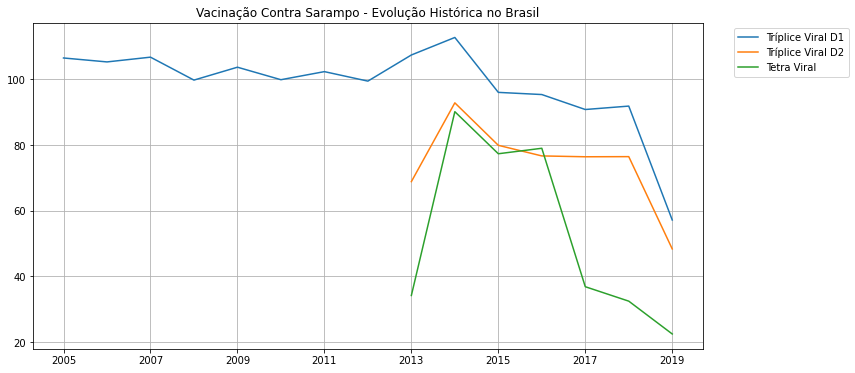

In [ ]:
#####Plotando os dados de vacinação contra sarampo:
vc_sarampo_ano.plot(figsize=(12,6),grid=True)
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")

plt.title("Vacinação Contra Sarampo - Evolução Histórica no Brasil")
plt.show()

Segundo o http://tabnet.datasus.gov.br/, o ano de 2013 foi o feita a introdução da Triplice Viral D2 e da Tetra Viral, o que explica a baixa adesão a estas vacinas nesses anos.
O ano de 2019 não tem todos os dados computados (Estes dados foram atualizados até 04/09/2019).

In [ ]:
#####Retirando os dados de 2019 da análise
vc_sarampo_ano = vc_sarampo_ano.drop("2019")

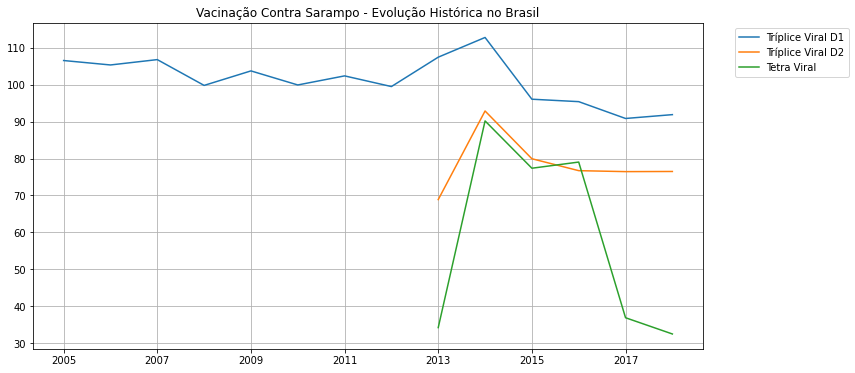

In [ ]:
vc_sarampo_ano.plot(figsize=(12,6),grid="true")
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")

plt.title("Vacinação Contra Sarampo - Evolução Histórica no Brasil")
plt.show()

Apesar de todas as vacinas, em uma primeira análise, aparentarem ter uma queda na taxa de vacinação, chama a atenção a queda acentuada da Tetra viral a partir de 2017.

Analisando informações do Ministério da Saúde, em 2017 houve uma ampliação do público esperado para a Tetra Viral ("há ampliação da oferta da dose, que passa a ser administrada de 15 meses até 4 anos. Antes, a aplicação era feita entre 15 meses e menores de 2 anos"). Portanto, essa mudança pode ser um dos motivos da grande baixa da % esperada.

Vamos analisar, então, as Tríplices Viral D1 e D2 (primeira e segunda doses).

In [ ]:
triplice_d1 = vc_sarampo_ano["Tríplice Viral D1"]

triplice_d1.head(3)

2005    106.55
2006    105.35
2007    106.80
Name: Tríplice Viral D1, dtype: float64

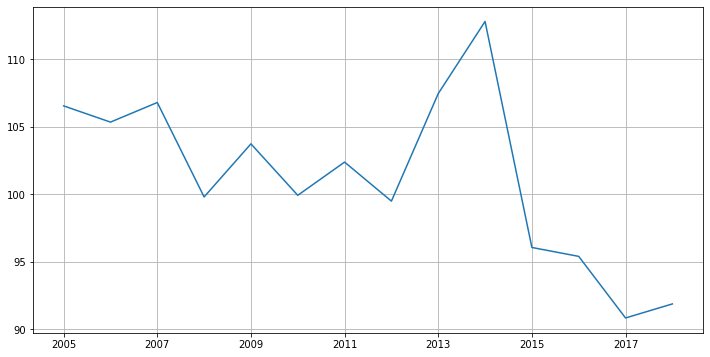

In [ ]:
triplice_d1.plot(figsize=(12,6),grid=True)

É possível perceber a tendência de queda para  Tríplice Viral D1. A partir de 2016, a meta do Ministério da saúde não foi mais atingida (95 %).

In [ ]:
triplice_d2 = vc_sarampo_ano["Tríplice Viral D2"]
triplice_d2 = triplice_d2.drop('2005')
triplice_d2 = triplice_d2.drop('2006')
triplice_d2 = triplice_d2.drop('2007')
triplice_d2 = triplice_d2.drop('2008')
triplice_d2 = triplice_d2.drop('2009')
triplice_d2 = triplice_d2.drop('2010')
triplice_d2 = triplice_d2.drop('2011')
triplice_d2 = triplice_d2.drop('2012')

triplice_d2.head(3)

2013    68.87
2014    92.88
2015    79.94
Name: Tríplice Viral D2, dtype: float64

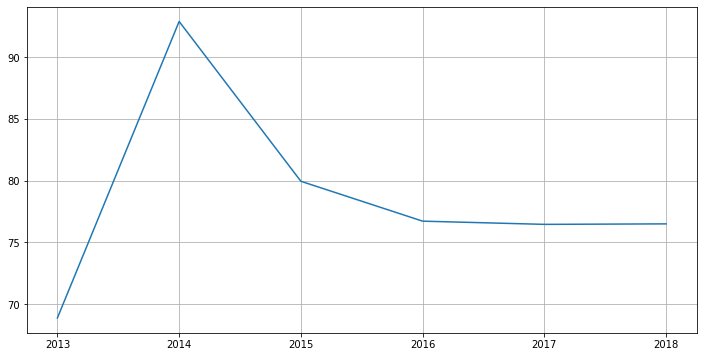

In [ ]:
triplice_d2.plot(figsize=(12,6),grid=True)

A Tríplice Viral D2 (segunda dose) não chegou em nenhum momento a 100 % da meta, porém também tem uma queda acentuada a partir de 2015 (lembrando que 2013 foi o primeiro ano desta no calendário de vacinas). 

In [ ]:
#####Separando por região
usaveis2 = ["Região","021 Tríplice Viral  D1"]
regiao = cv_regional[usaveis2]
regiao = regiao.drop(5)
regiao = regiao.sort_values('021 Tríplice Viral  D1')

regiao

,Região,021 Tríplice Viral D1
0,1 Região Norte,76.47
3,4 Região Sul,86.12
4,5 Região Centro-Oeste,86.42
1,2 Região Nordeste,86.96
2,3 Região Sudeste,88.52


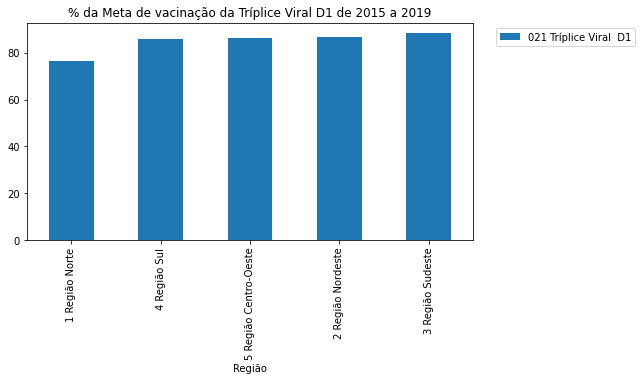

In [ ]:
#####Plotando por região

ax = regiao.plot(x="Região",kind="bar", figsize=(8,4))
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")

plt.title("% da Meta de vacinação da Tríplice Viral D1 de 2015 a 2019")
plt.show()

Entre 2015 e 2019, a região norte foi a que teve a menor % de vacinação. Qual o efeito disso?

Procurando reportagens sobre o assunto, vemos que "A volta do sarampo ocorreu primeiro na região Norte. Em 2018, de cada 100 casos, 95 foram no Amazonas, 3 em Roraima, 1 no Pará. " (https://piaui.folha.uol.com.br/mais-contagioso-que-o-coronavirus/)

Porém é importante ressaltar que, a partir de 2019, temos uma mudança nessa tendência. Na mesma reportagem citada acima, lê-se: "Em seguida, o sarampo migrou para o Sudeste. Em 2019, de cada 100 casos, 89 foram no estado de São Paulo, 4 no Paraná, 2 no Rio de Janeiro, 1 em Santa Catarina, 1 em Pernambuco, 1 em Minas Gerais." Como os dados de 2019 não estão completos, essa mudança de comportamento não será estudada nessa análise.

In [ ]:
#####Separando os dados da triplice viral por estado
usaveis3 = ["Unidade da Federação","021 Tríplice Viral  D1"]
estado = cv_estado[usaveis3]
estado = estado.drop(27)
estado = estado.sort_values('021 Tríplice Viral  D1')

estado.head(10)

,Unidade da Federação,021 Tríplice Viral D1
4,15 Pará,66.72
1,12 Acre,75.10
7,21 Maranhão,76.98
8,22 Piauí,77.11
15,29 Bahia,77.65
5,16 Amapá,78.69
10,24 Rio Grande do Norte,82.48
2,13 Amazonas,82.52
22,43 Rio Grande do Sul,82.70
25,52 Goiás,82.78


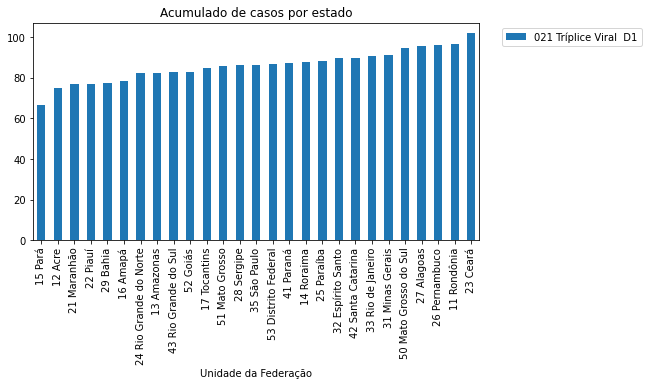

In [ ]:
#####plotando por estado
ax = estado.plot(x="Unidade da Federação",kind="bar", figsize=(8,4))
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")

plt.title("Acumulado de casos por estado")
plt.show()

Olhando por estado, quando vemos estados da região Norte entre os 10 com menor % de vacinação (Pará, Acre, Amapá, Amazonas). 

###Conclusão

Percebe-se que há uma forte correlação entre a não vacinação e o retorno do sarampo ao Brasil. 

A diminuição da % de vacinação da tríplice viral e o fato da região Norte, região esta que tinha a menor % de vacinado, ser a que apresentou o retorno do casos no Brasil até 2018, são evidências disso. (Obviamente que outros fatores devem ser estudados como fatores geográficos e migração, porém não é possível analisá-los com os dados presentes). 

Campanhas e movimentos antivacina, o próprio fato do país ter atingido por um tempo a imunização (o efeito psicológico de conhecer alguém com a doença pode levar a pessoa ao ato de vacinar), a desinformação sobre a necessidade de outras doses, podem ser motivos que levam a diminuição da % de vacinados no Brasil. Um caminho perigoso a se seguir, que observamos aqui com o dados da vacinação para sarampo.
